**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [137]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# import data 2C_weka.csv for 2 Class Classifcation.


In [139]:
class2_Data = pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [140]:
class2_Data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [141]:
class2_Data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [142]:
class2_Data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [143]:
class2_Data.shape

(310, 7)

In [144]:
print('Missing values by column:\n',class2_Data.isnull().sum())
print('-----------------------------')
print('Total Missing values: ',class2_Data.isnull().sum().sum())

Missing values by column:
 pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
-----------------------------
Total Missing values:  0


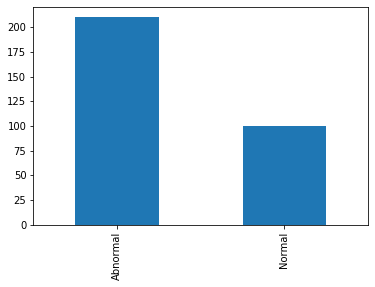

In [145]:
class2_Data['class'].value_counts().plot(kind='bar')

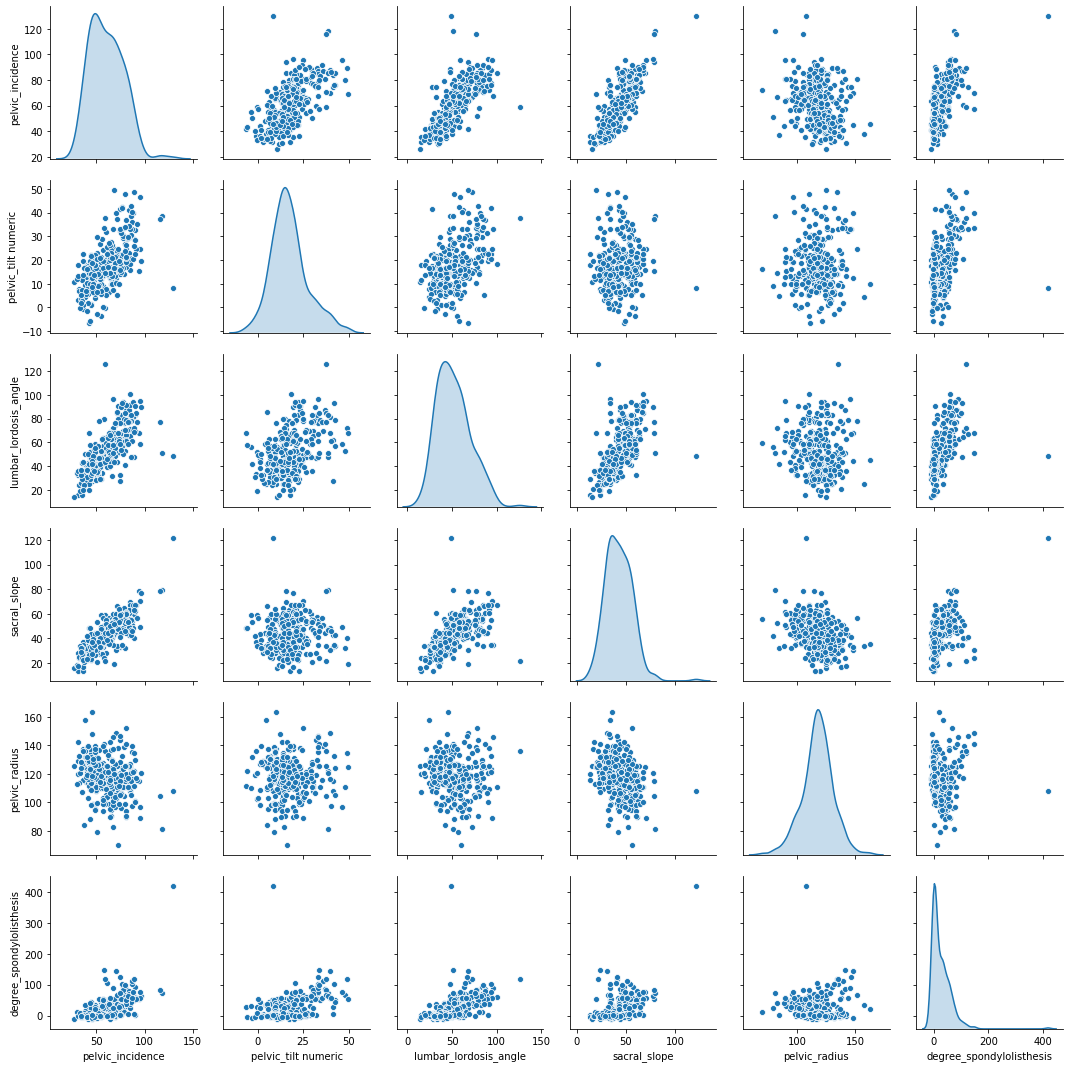

In [146]:
class2_Data_Pairplot = class2_Data.drop(columns='class')
sns.pairplot(class2_Data_Pairplot, diag_kind='kde')

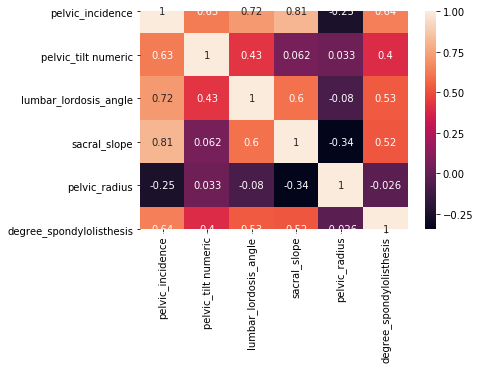

In [147]:
corr = class2_Data_Pairplot.corr()
sns.heatmap(corr, annot=True)

# Encode the Class variable to integer.

In [148]:
class2_Data['class'] = class2_Data['class'].astype('category')
class2_Data['class'] = class2_Data['class'].cat.codes

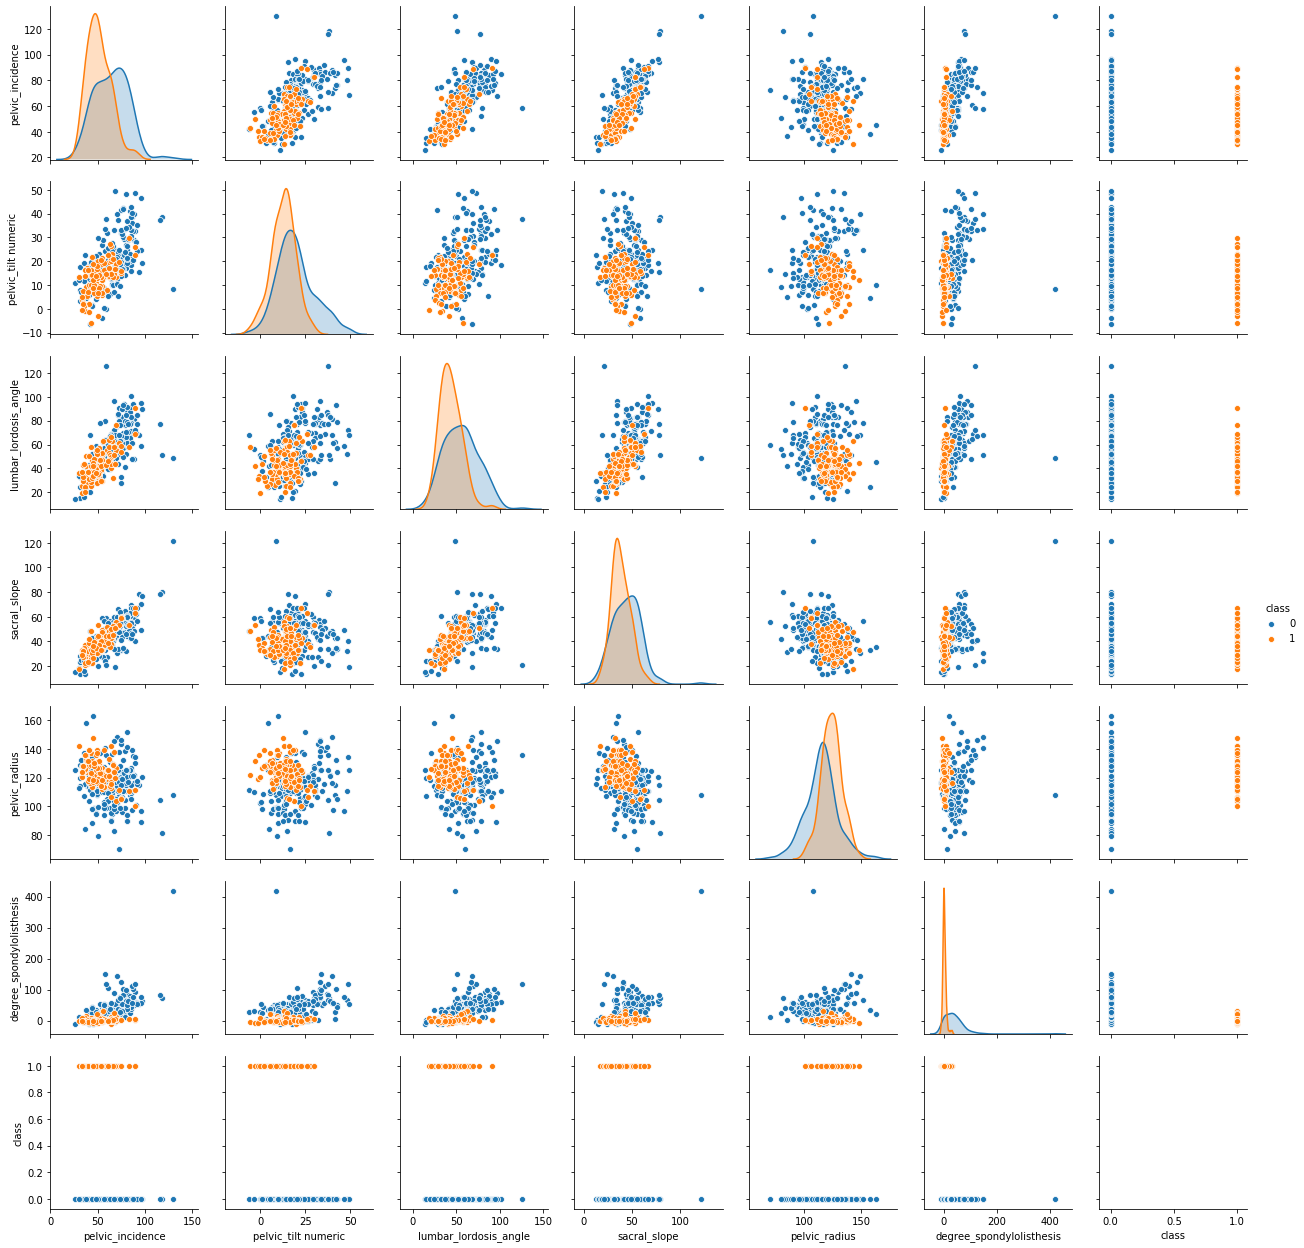

In [153]:
sns.pairplot(class2_Data, hue='class',diag_kind='kde')

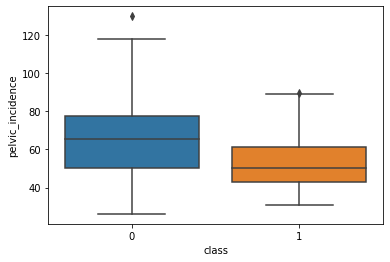

In [154]:
sns.boxplot(x = "class", y = "pelvic_incidence", data = class2_Data )

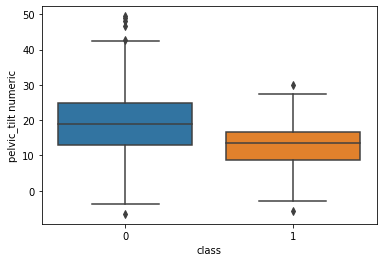

In [155]:
sns.boxplot(x = "class", y = "pelvic_tilt numeric", data = class2_Data )
#,"pelvic_tilt numeric","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis"

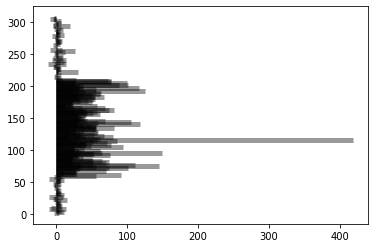

In [156]:
#Identifying the negaTIVE values present too.
plt.hlines(y=class2_Data.index, xmin=0, xmax=class2_Data.degree_spondylolisthesis,  alpha=0.4, linewidth=5)

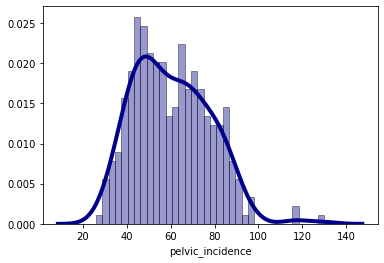

In [157]:
# Density Plot and Histogram 
sns.distplot(class2_Data['pelvic_incidence'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [158]:
X= class2_Data.drop("class",axis=1)
y=class2_Data["class"]
print(X)
print(y)

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027818            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis  
0       40.475232      98.672917                 -0.254400  
1       28.995960     114.405425                 

# Normalize your Data (X) to get values between 0 to 1.

In [159]:
from sklearn.preprocessing import minmax_scale
X = minmax_scale(X)
X

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

# Split the dat as train and test with a ratio of 70:30.

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=79)
print("Training Independent variables",X_train)
print("Training Target variables",y_train)
print("Test Independent variables",X_test)
print("Test Target variables",y_test)

Training Independent variables [[0.35893346 0.47474698 0.47876824 0.27736495 0.65509934 0.11316281]
 [0.45143673 0.46675135 0.4206736  0.37026435 0.44254383 0.02763416]
 [0.61104636 0.99056544 0.51908166 0.25202387 0.69419057 0.30123643]
 ...
 [0.38199672 0.29270862 0.32953382 0.39380748 0.36899613 0.11723753]
 [0.44436433 0.52927927 0.68908498 0.33108292 0.72755346 0.15796572]
 [0.54258567 0.63999662 0.56428512 0.36796411 0.50500531 0.17184197]]
Training Target variables 200    0
254    1
141    0
78     0
72     0
      ..
82     0
216    1
148    0
74     0
189    0
Name: class, Length: 217, dtype: int8
Test Independent variables [[2.42692559e-01 2.75609364e-01 3.84813693e-01 2.69004167e-01
  6.06415894e-01 2.07497872e-02]
 [4.42955695e-01 4.55484488e-01 3.31118759e-01 3.67964114e-01
  4.74579696e-01 2.80916754e-02]
 [1.65901520e-01 2.50459293e-01 1.25874195e-01 2.08353300e-01
  4.59128038e-01 3.91326973e-02]
 [2.69823955e-01 5.93093905e-01 1.90883225e-01 1.30549296e-01
  5.52374273

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [161]:
KNN = KNeighborsClassifier(n_neighbors= 3, weights = 'distance', p=2)

In [162]:
KNN.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_test_pred = KNN.predict(X_test)
y_test_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1], dtype=int8)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [163]:
accuracy_score_test = accuracy_score(y_test, y_test_pred)

In [164]:
accuracy_score_test

0.8494623655913979

In [165]:
print("Performance Score ",KNN.score(X_test, y_test))

Performance Score  0.8494623655913979


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [166]:
neighbors = list(range(1, 20, 2))
cv_list=[]
cv_df = pd.DataFrame()
for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors= k, weights = 'distance', p=2)
    KNN.fit(X_train, y_train)
    y_test_pred = KNN.predict(X_test)
    accuracy_score_test = accuracy_score(y_test, y_test_pred)
    print("test accuracy for k="+ str(k)+" is ",accuracy_score_test)
    cv_list.append(accuracy_score_test)

data = pd.DataFrame({"K": neighbors,"Accuracy": cv_list})
print('****************************')  
print('List of Optimal Neighbours')   
print('****************************')  
print(data[data["Accuracy"] == data["Accuracy"].max()])

test accuracy for k=1 is  0.8817204301075269
test accuracy for k=3 is  0.8494623655913979
test accuracy for k=5 is  0.8602150537634409
test accuracy for k=7 is  0.8709677419354839
test accuracy for k=9 is  0.9139784946236559
test accuracy for k=11 is  0.8817204301075269
test accuracy for k=13 is  0.8924731182795699
test accuracy for k=15 is  0.9247311827956989
test accuracy for k=17 is  0.9139784946236559
test accuracy for k=19 is  0.9032258064516129
****************************
List of Optimal Neighbours
****************************
    K  Accuracy
7  15  0.924731


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [167]:
class3_Data = pd.read_csv("3Classdata.csv")

# Explore the data set.Get necessary information about the data.
Look at the head and tail of dataset. Find the missing value. Look at the unique values of class values. Look at the distribution of class values and other attributes. Get the datatype information about the dataset Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [168]:
class3_Data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [169]:
class3_Data.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [170]:
class3_Data.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [171]:
class3_Data.shape

(310, 7)

In [172]:
print('Missing values by column:\n',class2_Data.isnull().sum())
print('-----------------------------')
print('Total Missing values: ',class2_Data.isnull().sum().sum())

Missing values by column:
 pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
-----------------------------
Total Missing values:  0


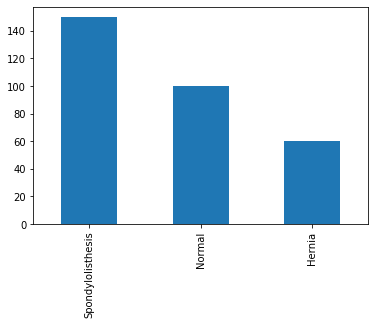

In [173]:
class3_Data['class'].value_counts().plot(kind='bar')

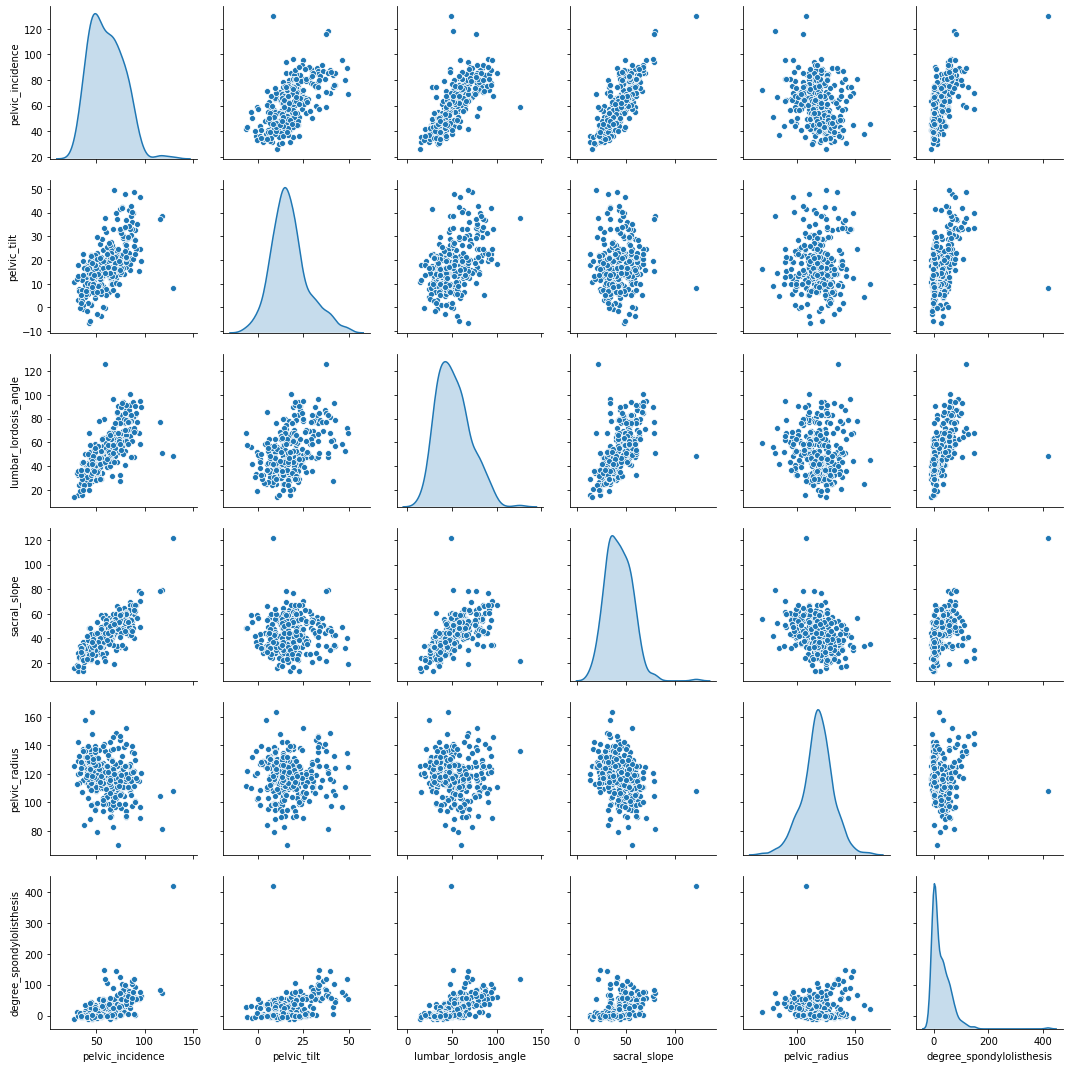

In [174]:
class3_Data_Pairplot = class3_Data.drop(columns='class')
sns.pairplot(class3_Data_Pairplot, diag_kind='kde')

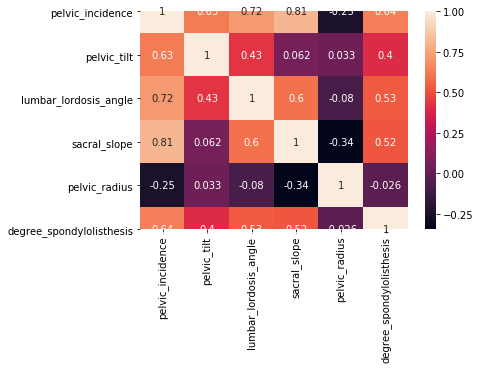

In [175]:
corr = class3_Data_Pairplot.corr()
sns.heatmap(corr, annot=True)

# Encode the Class variable to integer.

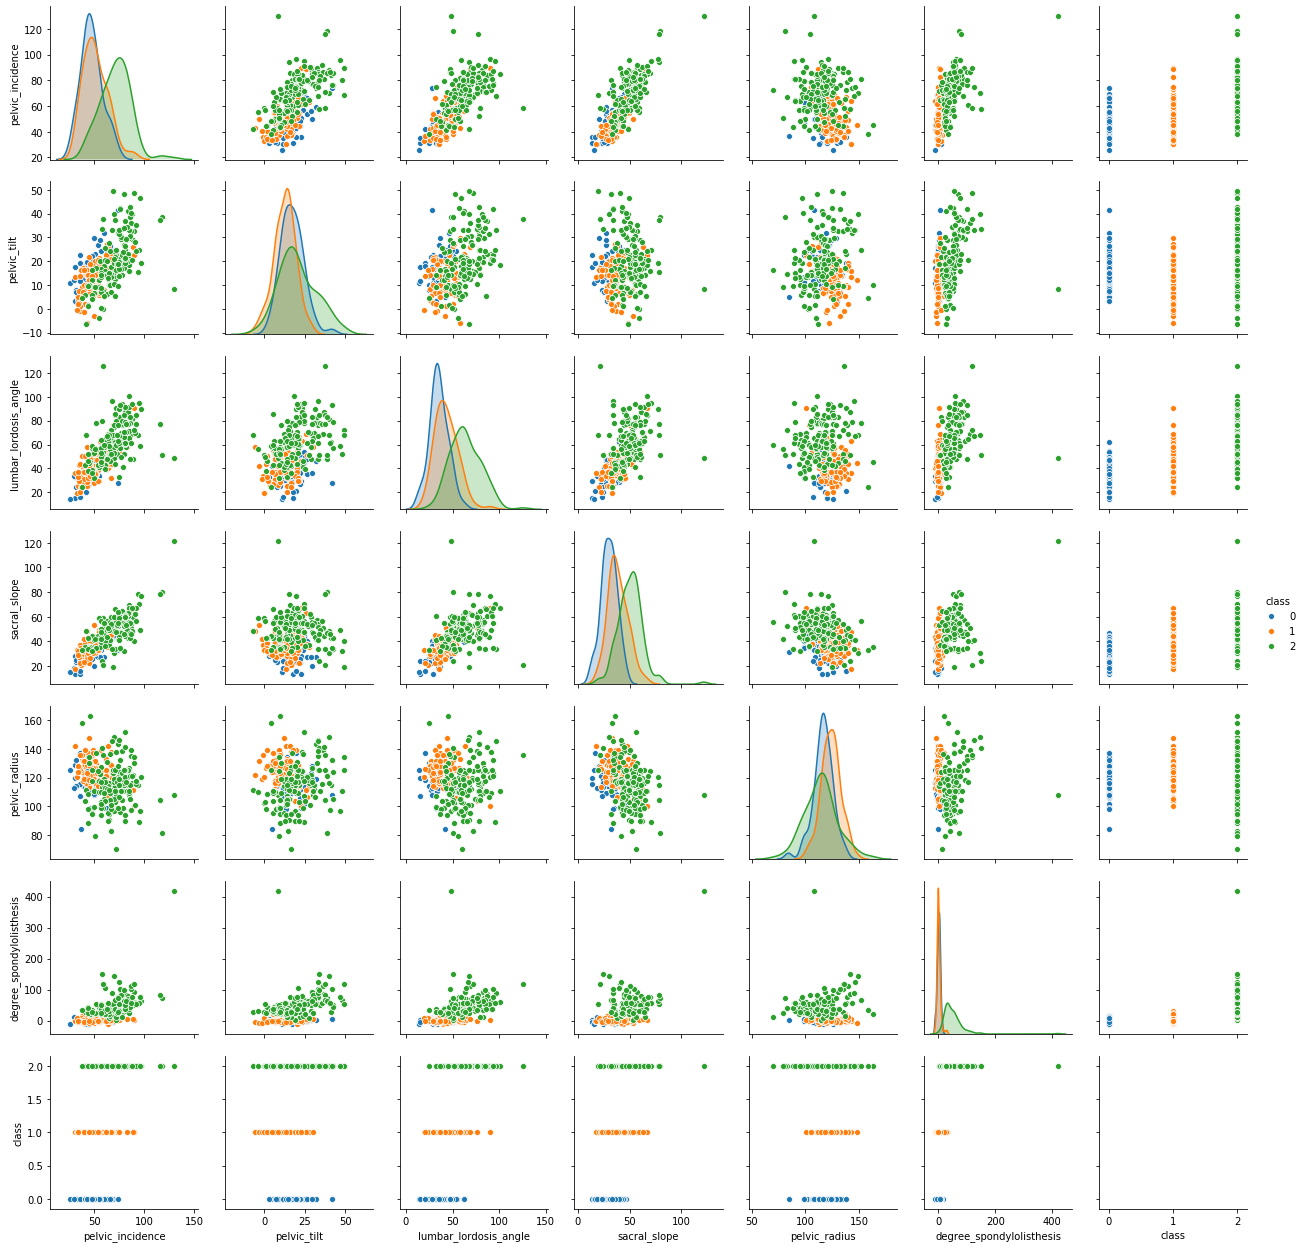

In [179]:
class3_Data['class'] = class3_Data['class'].astype('category')
class3_Data['class'] = class3_Data['class'].cat.codes
sns.pairplot(class3_Data, hue='class',diag_kind='kde')

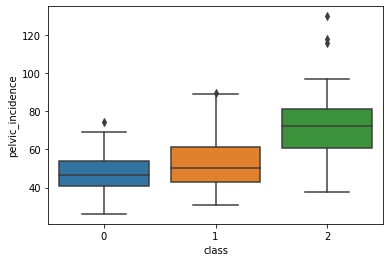

In [180]:
sns.boxplot(x = "class", y = "pelvic_incidence", data = class3_Data )


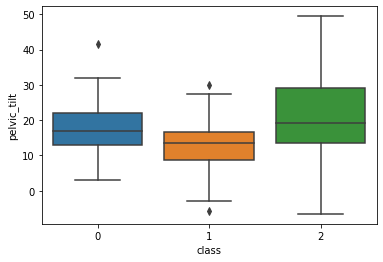

In [181]:
sns.boxplot(x = "class", y = "pelvic_tilt", data = class3_Data )

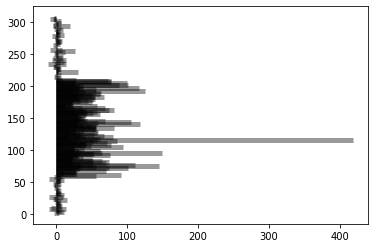

In [182]:
plt.hlines(y=class3_Data.index, xmin=0, xmax=class3_Data.degree_spondylolisthesis,  alpha=0.4, linewidth=5)

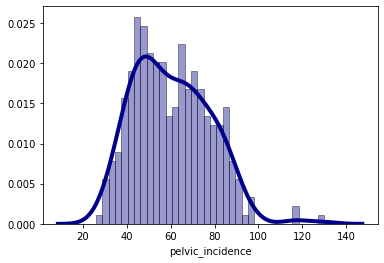

In [183]:
# Density Plot and Histogram 
sns.distplot(class3_Data['pelvic_incidence'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Create the X(Feature-set) and Y(Target-set) sets for your Data

In [184]:
X= class3_Data.drop("class",axis=1)
y=class3_Data["class"]
print(X)
print(y)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027818    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  
0        98.672917                 -0.254400  
1    

# Normalize your Data (X) to get values between 0 to 1.

In [185]:
from sklearn.preprocessing import minmax_scale
X = minmax_scale(X)
X

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

# Split the dat as train and test with a ratio of 70:30.

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=79)
print("Training Independent variables",X_train)
print("Training Target variables",y_train)
print("Test Independent variables",X_test)
print("Test Target variables",y_test)

Training Independent variables [[0.35893346 0.47474698 0.47876824 0.27736495 0.65509934 0.11316281]
 [0.45143673 0.46675135 0.4206736  0.37026435 0.44254383 0.02763416]
 [0.61104636 0.99056544 0.51908166 0.25202387 0.69419057 0.30123643]
 ...
 [0.38199672 0.29270862 0.32953382 0.39380748 0.36899613 0.11723753]
 [0.44436433 0.52927927 0.68908498 0.33108292 0.72755346 0.15796572]
 [0.54258567 0.63999662 0.56428512 0.36796411 0.50500531 0.17184197]]
Training Target variables 200    2
254    1
141    2
78     2
72     2
      ..
82     2
216    1
148    2
74     2
189    2
Name: class, Length: 217, dtype: int8
Test Independent variables [[2.42692559e-01 2.75609364e-01 3.84813693e-01 2.69004167e-01
  6.06415894e-01 2.07497872e-02]
 [4.42955695e-01 4.55484488e-01 3.31118759e-01 3.67964114e-01
  4.74579696e-01 2.80916754e-02]
 [1.65901520e-01 2.50459293e-01 1.25874195e-01 2.08353300e-01
  4.59128038e-01 3.91326973e-02]
 [2.69823955e-01 5.93093905e-01 1.90883225e-01 1.30549296e-01
  5.52374273

# # Build the KNN model using Train Dataset and predict the class on test dataset.

In [187]:
KNN = KNeighborsClassifier(n_neighbors= 3, weights = 'distance', p=2)
KNN.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_test_pred = KNN.predict(X_test)
y_test_pred

array([1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2,
       2, 0, 1, 2, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 1], dtype=int8)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [188]:
accuracy_score_test = accuracy_score(y_test, y_test_pred)
print("accuracy_score: ",accuracy_score_test)
print("Performance Score ",KNN.score(X_test, y_test))

accuracy_score:  0.8494623655913979
Performance Score  0.8494623655913979


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [189]:
neighbors = list(range(1, 20, 2))
cv_list=[]
cv_df = pd.DataFrame()
for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors= k, weights = 'distance', p=2)
    KNN.fit(X_train, y_train)
    y_test_pred = KNN.predict(X_test)
    accuracy_score_test = accuracy_score(y_test, y_test_pred)
    print("test accuracy for k="+ str(k)+" is ",accuracy_score_test)
    cv_list.append(accuracy_score_test)

data = pd.DataFrame({"K": neighbors,"Accuracy": cv_list})
print('****************************')  
print('List of Optimal Neighbours')   
print('****************************')  
print(data[data["Accuracy"] == data["Accuracy"].max()])

test accuracy for k=1 is  0.8602150537634409
test accuracy for k=3 is  0.8494623655913979
test accuracy for k=5 is  0.8494623655913979
test accuracy for k=7 is  0.8602150537634409
test accuracy for k=9 is  0.9032258064516129
test accuracy for k=11 is  0.8817204301075269
test accuracy for k=13 is  0.8602150537634409
test accuracy for k=15 is  0.8924731182795699
test accuracy for k=17 is  0.8817204301075269
test accuracy for k=19 is  0.8817204301075269
****************************
List of Optimal Neighbours
****************************
   K  Accuracy
4  9  0.903226
